## <font color='darkblue' size='5'> Personal Key Indicators of Heart Disease   </font>
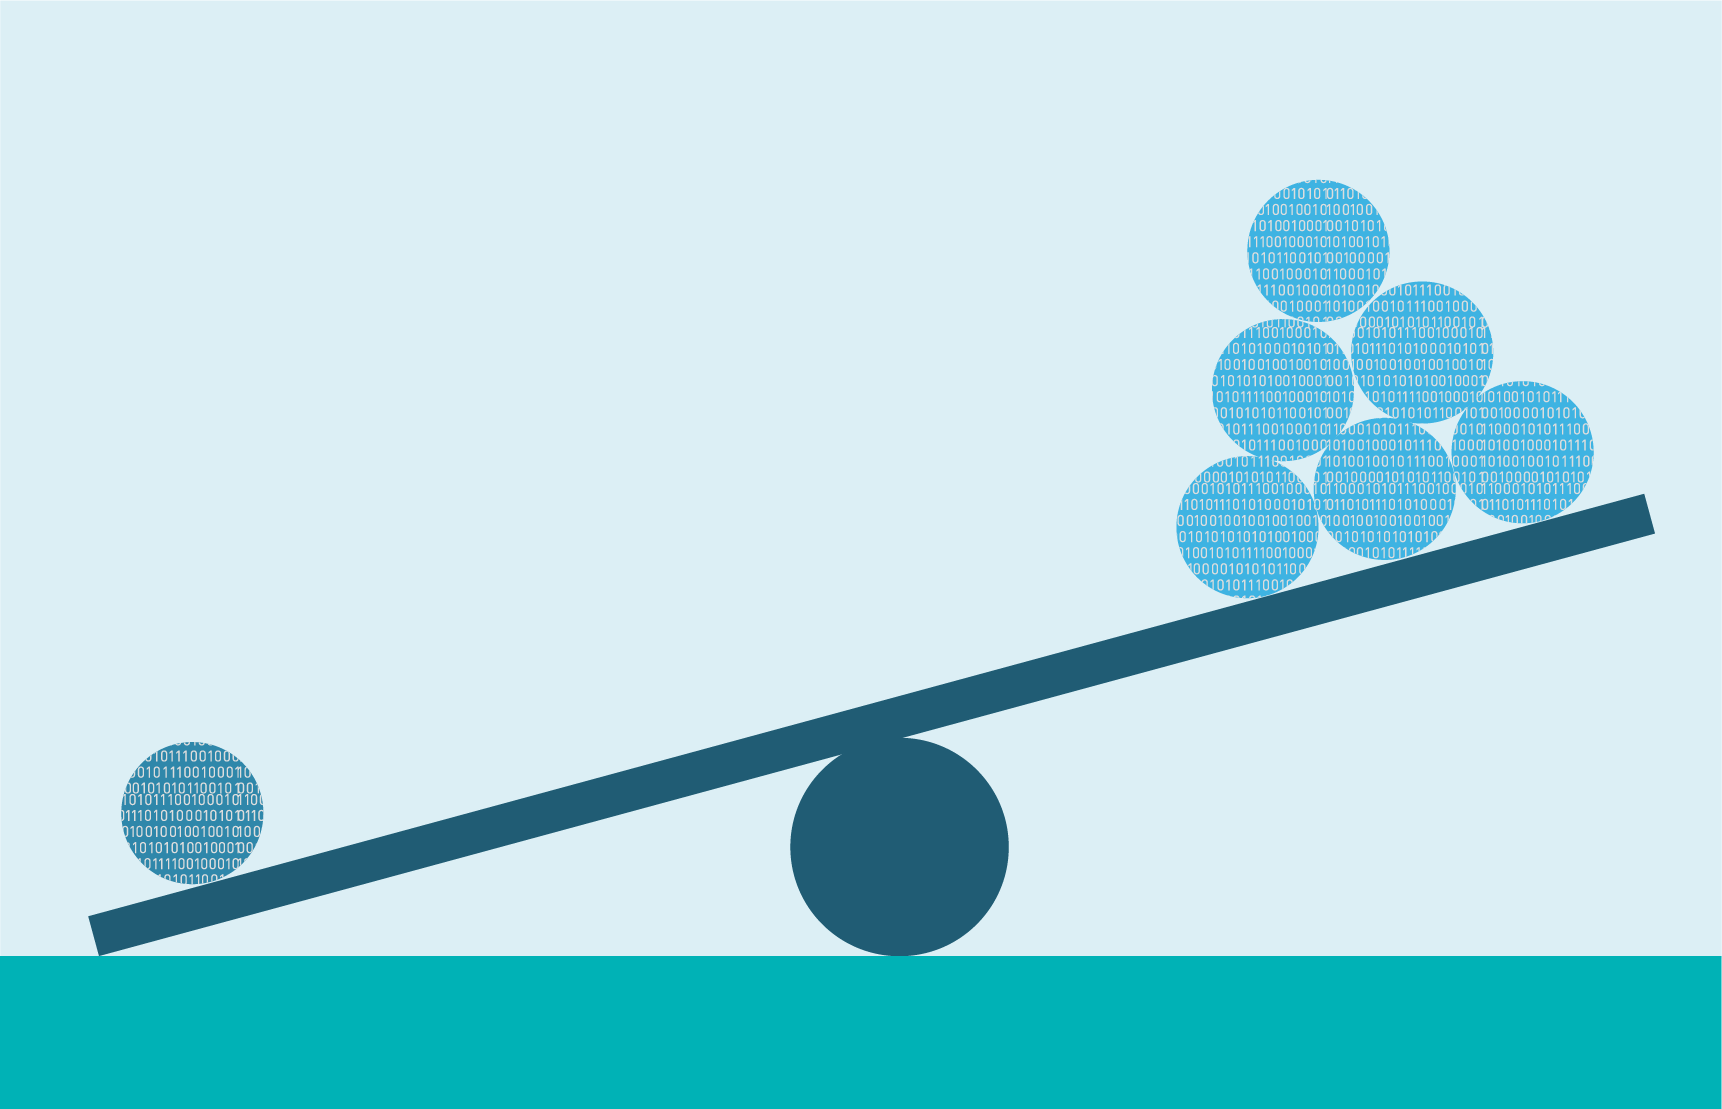
### Submitted to: <font color='darkred' size='4'> DR. Doaa Mahmoud </font>
### Facilitator: <font color='darkred' size='4'> Eng. Marwan Hatem </font>
### Presented by:  <font color='darkred' size='4'> Mohamed Anwar </font>

ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
#### <font color='green' size='4'>Introduction : </font>

A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes. When observation in one class is higher than in other classes, a class imbalance exists. Example: To detect fraudulent credit card transactions. As shown in the graph below, the fraudulent transaction is around 400 compared to the non-fraudulent transaction of around 90000.
 In this notebook , we try to further explain the problem of imbalance classification and discuss some of the used techniques to address this problem .
#### Here is the dataset used in this project 

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/code




# Imprting Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import missingno as msno
os.chdir('C:\\Users\\Anwar\\Desktop') 
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')


# Loading Dataset 

In [2]:
df=pd.read_csv('heart_2020_cleaned.csv')
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# EDA

In [3]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.shape

(319795, 18)

# Handling Null values 

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### There's no null values in this dataset

# Handling Duplicates 

In [7]:
df.duplicated().sum()


18078

In [8]:
df.drop_duplicates(inplace = True)


In [9]:
df.duplicated().sum()


0

# Handling Outliers

BMI                  AxesSubplot(0.125,0.712609;0.168478x0.167391)
PhysicalHealth    AxesSubplot(0.327174,0.712609;0.168478x0.167391)
MentalHealth      AxesSubplot(0.529348,0.712609;0.168478x0.167391)
SleepTime         AxesSubplot(0.731522,0.712609;0.168478x0.167391)
dtype: object

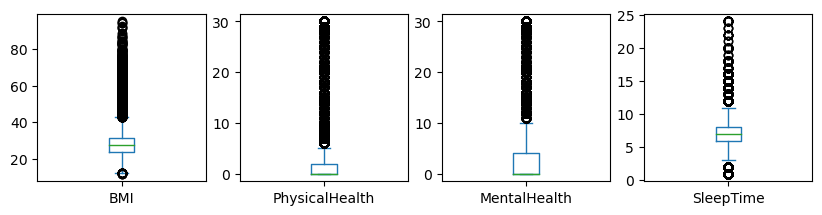

In [10]:
df.plot(kind = "box" , subplots = True , figsize = (10,10) , layout = (4,4))

- #### I think such information is important hence I'll not remove these outliers.

# Visualizing Target Column

<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

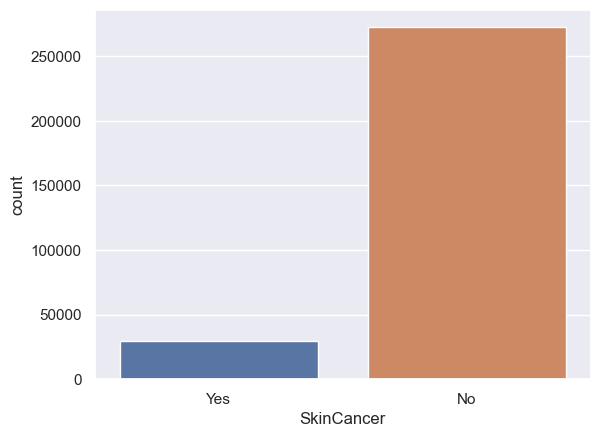

In [11]:
sns.set()
sns.countplot(data=df , x='SkinCancer')

In [12]:
df['SkinCancer'].value_counts()

No     272425
Yes     29292
Name: SkinCancer, dtype: int64

In [13]:
y = df['SkinCancer'].values
unique_labels, counts = np.unique(y, return_counts=True)
proportions = counts / len(y)

print(proportions)

[0.90291565 0.09708435]


- #### it's clear from the visualization and proportions that this dataset is imbalanced , because 'Yes' class is much less than 'No' class.

- ### We'll first apply some machine learning model on the dataset before handling imbalanced data

# Encoding Categorical variables

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:

categorical_columns = df.select_dtypes('object').columns
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int32  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int32  
 3   AlcoholDrinking   301717 non-null  int32  
 4   Stroke            301717 non-null  int32  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int32  
 8   Sex               301717 non-null  int32  
 9   AgeCategory       301717 non-null  int32  
 10  Race              301717 non-null  int32  
 11  Diabetic          301717 non-null  int32  
 12  PhysicalActivity  301717 non-null  int32  
 13  GenHealth         301717 non-null  int32  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int32  
 16  KidneyDisease     30

# Splitting dataset into Train & Test


In [18]:
X = df.drop('SkinCancer', axis=1)  # Features
Y = df['SkinCancer']  # Target variable


In [19]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()


In [20]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [22]:
X_train_Scaled=scaler.fit_transform(X_train)

In [23]:
X_test_Scaled=scaler.fit_transform(X_test)

In [24]:
X_train.shape

(226287, 17)

# Decision Tree Model 

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier(max_depth =8, max_features= 17)

In [27]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=8, max_features=17)

In [28]:
print (dt.score(X_train , y_train))
print (dt.score(X_test , y_test))

0.903114186851211
0.9028503248044545


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators= 5,max_features=14)

In [31]:
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=10, max_features=14, min_samples_split=10,
                       n_estimators=5)

In [32]:
print (rf.score(X_train , y_train))
print (rf.score(X_test , y_test))

0.9034367860283622
0.9026647222590481


# Class Imbalance 

 ###  The Problem With Class Imbalance in Machine Learning
- Most machine learning algorithms work best when the number of samples in each class is about equal. This is because most algorithms are designed to maximize accuracy and reduce errors.

- However, if the dataframe has imbalanced classes, then In such cases, you get a pretty high accuracy just by predicting the majority class, but you fail to capture the minority class, which is most often the point of creating the model in the first place. For example, if the class distribution shows that 99% of the data has the majority class, then any basic classification model like the logistic regression or decision tree will not be able to identify the minor class data points,  like the case in this dataset such that the majority of No class is about 90 % of the whole dataset .


# Various Techniques to solve class imbalance problem

 ##   <font color='darkblue'>Resampling Techniques to Solve Class Imbalance
- One of the widely adopted class imbalance techniques for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

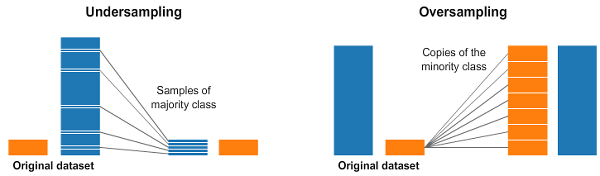

In [34]:
df['SkinCancer'].value_counts()

0    272425
1     29292
Name: SkinCancer, dtype: int64

#   <font color='darkblue'>1- OverSampling

In [35]:
from sklearn.utils import resample
df_majority = df[(df['SkinCancer']==0)] 
df_minority =  df[(df['SkinCancer']==1)] 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 272425, # to match majority class
                                 random_state=42)  # reproducible results
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

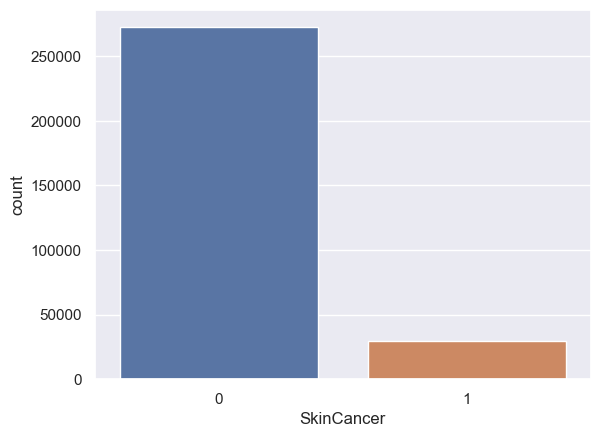

In [36]:
sns.set()
sns.countplot(data=df , x='SkinCancer')

In [37]:
df_upsampled['SkinCancer'].value_counts()

1    272425
0    272425
Name: SkinCancer, dtype: int64

# The Metric Trap
 Before Applying any models of one of the resampled datasets , you need to notice that : One of the major issues that new developer users fall into when dealing with unbalanced datasets relates to the evaluation metrics used to evaluate their machine learning model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features, and it will have a high accuracy rate, obviously not the correct one.

## Re-apply Decision Tree 

In [38]:
X = df_upsampled.drop('SkinCancer', axis=1)  # Features
Y = df_upsampled['SkinCancer']  # Target variable


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [40]:
X_train_Scaled=scaler.fit_transform(X_train)

In [41]:
X_test_Scaled=scaler.fit_transform(X_test)

In [42]:
X_train.shape

(408637, 17)

- #### Notice the difference between shape after and before Oversampling 

In [43]:
dt1 = DecisionTreeClassifier(max_depth = 24, max_features= 14)

In [44]:
dt1.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=24, max_features=14)

In [45]:
print (dt1.score(X_train , y_train))
print (dt1.score(X_test , y_test))

0.899923403901262
0.8663196611189827


#  <font color='darkblue'>2- Random Under-sampling 
- Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out 
Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

### Separating the class 0 and 1 

In [46]:
# class count
class_count_0, class_count_1 = df['SkinCancer'].value_counts()

# Separate class
class_0 = df[df['SkinCancer'] == 0]
class_1 = df[df['SkinCancer'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (272425, 18)
class 1: (29292, 18)


total class of 1 and0: 0    29292
1    29292
Name: SkinCancer, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

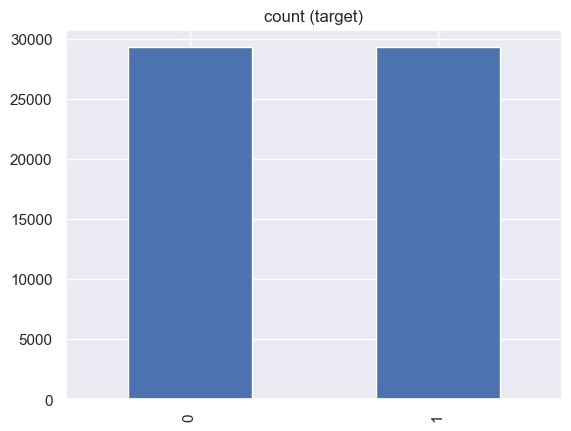

In [47]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['SkinCancer'].value_counts())# plot the count after under-sampeling
test_under['SkinCancer'].value_counts().plot(kind='bar', title='count (target)')

### We undersampled the class 0 to have 29292 like class 1 

##  <font color='darkblue'> 3- Balance Data With the Imbalanced-Learn Python Module

In [48]:
import imblearn


##   <font color='darkblue'>Random Under-Sampling With Imblearn


In [49]:
X = df.drop('SkinCancer', axis=1)  # Features
Y = df['SkinCancer']  # Target variable


In [50]:
X.shape

(301717, 17)

In [51]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, Y)

print('original dataset shape:', Counter(Y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 272425, 1: 29292})
Resample dataset shape Counter({0: 29292, 1: 29292})


In [52]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_rus, y_rus, test_size=0.25, random_state=42)

In [53]:
X_train2_Scaled=scaler.fit_transform(X_train2)

In [54]:
X_test2_Scaled=scaler.fit_transform(X_test2)

In [55]:
dt2 = DecisionTreeClassifier(max_depth = 7, max_features= 14)

In [56]:
dt2.fit(X_train2 , y_train2)

DecisionTreeClassifier(max_depth=7, max_features=14)

In [57]:
print (dt2.score(X_train2 , y_train2))
print (dt.score(X_test2 , y_test2))

0.7353998816514179
0.4982930492967363


#### Ovefitting problem , but again , Scores isn't a good metric for measuring model's accuarcy 

#  <font color='darkblue'>4- Under-Sampling: Tomek Links

- #### Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process
- #### Tomek’s link exists if the two samples are the nearest neighbors of each other.

 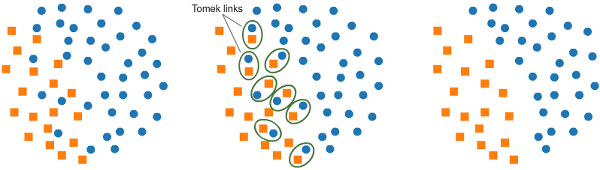

##   <font color='darkblue'>5- Random Over-Sampling With imblearn


In [58]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 272425, 1: 29292})
Resample dataset shape Counter({1: 272425, 0: 272425})


##  <font color='darkblue'> 6- Synthetic Minority Oversampling Technique (SMOTE)
- This technique generates synthetic data for the minority class.
SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

#### SMOTE algorithm works in 4 simple steps:
1- Choose a minority class as the input vector.

2- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function).

3- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor.

4- Repeat the steps until the data is balanced.

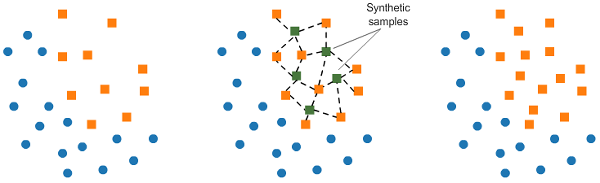

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 272425, 1: 29292})
Resample dataset shape Counter({1: 272425, 0: 272425})


##  <font color='darkblue'>7- NearMiss
- NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance will make the majority class equal to the minority class.

In [60]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X, Y)

print('Original dataset shape:', Counter(Y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 272425, 1: 29292})
Resample dataset shape: Counter({0: 29292, 1: 29292})


# 8- Change the Performance Metric
Accuracy is not the best metric to use when evaluating imbalanced datasets, as it can be misleading.

Metrics that can provide better insight are:

- Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
- Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
- Recall: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
- F1: Score: the weighted average of precision and recall.
- Area Under ROC Curve (AUROC): AUROC represents the likelihood of your model distinguishing observations from two classes.
In other words, if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?

# Building ML Models Using SMOTE Resampling  

In [61]:
x_smote.shape

(544850, 17)

In [62]:
 y_smote.shape

(544850,)

In [63]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_smote, y_smote, test_size=0.30, random_state=42)

In [64]:
X_train3_Scaled=scaler.fit_transform(X_train3)

In [65]:
X_test3_Scaled=scaler.fit_transform(X_test3)

# Non-Linear Models 

# Decision Tree 

In [66]:
dt3 = DecisionTreeClassifier(max_depth =6, max_features= 14)

In [67]:
dt3.fit(X_train3_Scaled,y_train3)

DecisionTreeClassifier(max_depth=6, max_features=14)

In [68]:
print (dt3.score(X_train3_Scaled,y_train3))
print (dt3.score(X_test3_Scaled,y_test3))

0.7440317780778458
0.7433544400599553


In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier(max_depth=9, min_samples_leaf=1, min_samples_split=10, n_estimators= 5,max_features=14)

In [71]:
rf.fit(X_train3_Scaled,y_train3)

RandomForestClassifier(max_depth=9, max_features=14, min_samples_split=10,
                       n_estimators=5)

In [72]:
print (rf.score(X_train3_Scaled,y_train3))
print (rf.score(X_test3_Scaled,y_test3))

0.7688223495326367
0.7667859655562693


#### We can apply these models on different types of samplings for the same dataset and you'll get different result , but remember , score isn't a good metric.

# Linear Models 

# Logistic Regression 

In [73]:
from sklearn.linear_model import LogisticRegression

classfier3=LogisticRegression(C=10,penalty='l1',solver='saga')

In [74]:
classfier3.fit(X_train3_Scaled,y_train3)

LogisticRegression(C=10, penalty='l1', solver='saga')

In [75]:
classfier3.score(X_train3_Scaled,y_train3)

0.7496008075617142

In [76]:
classfier3.score(X_test3_Scaled,y_test3)

0.7499984705270564

# KNN 

In [77]:
from sklearn.neighbors import KNeighborsClassifier
classifier4=KNeighborsClassifier(n_neighbors=3)

In [78]:
classifier4.fit(X_train3_Scaled,y_train3)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
classifier4.score(X_train3_Scaled,y_train3)

In [ ]:
classifier4.score(X_test3_Scaled,y_test3)

# Support Vector Machines 

In [81]:
from sklearn.svm import SVC

In [82]:
classifier5= SVC(C=0.1, kernel='rbf')

In [ ]:
 classifier5.fit(X_train3_Scaled,y_train3)

In [ ]:
 classifier5.score(X_train3_Scaled,y_train3)

In [ ]:
 classifier5.score(X_test3_Scaled,y_test3)

# Naïve Bayes 

In [86]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(X_train3_Scaled, y_train3)



GaussianNB()

In [87]:
nb_classifier.score(X_train3_Scaled,y_train3)

0.7180324860053225

In [88]:
nb_classifier.score(X_test3_Scaled,y_test3)

0.7179040102780582

#### You can keep trying to build different models out of different versions of  samplings and you'll get different results 

# <font color='green' size='4'>Conclusion
To summarize, in this Notebook , I have shown various techniques to handle the class imbalance in a dataset. 

#### Key Takeaways

In this article, we learned about the different techniques that we can perform to handle class imbalance.
Some of the most widely used techniques are SMOTE, imblearn oversampling, and undersampling.
There is no “best“ method for handling imbalance, it depends on your use case.

# <font color='red' size='4'>Thanks 